## NBA Prediction



By Tom Fluzin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Introduction

In [2]:
#df_rs2324 = pd.read_csv('db_23_24_rs.txt')

df2223 = pd.read_csv('./data/db_22_23.txt')
df2324 = pd.read_csv('./data/db_23_24.txt')

#Initial Data Exploration

The datasets, df2223 and df2324, are sourced from the NBA's official website and were downloaded on 12/04/2023 at 3 p.m. These datasets encompass a comprehensive compilation of statistics for each game played during the 2022-2023 and 2023-2024 seasons. They offer a detailed account of essential metrics, providing information on the winning team, points scored by each team, the percentage of 3-pointers made, and the number of rebounds secured. These datasets serve as valuable resources for analyzing team dynamics, player contributions, and overall game outcomes throughout the specified playoff periods.

**Descriptive Statistics for df2223:**

Derived from 1671 observations, each corresponding to a team's performance during a game in the 2022-2023 season, the summary statistics within df2223 offer a concise overview of team performance.

**Descriptive Statistics for df2324:**

Expanding the dataset to 612 observations, df2324 provides a more extensive view of basketball performance during the 2023-2024 season.

Variables Included in the Datasets:

- W/L (Win/Loss)
- MIN (Minutes Played)
- PTS (Points)
- FGM (Field Goals Made)
- FGA (Field Goals Attempted)
- FG% (Field Goal Percentage)
- 3PM (3 Point Field Goals Made)
- 3PA (3 Point Field Goals Attempted)
- 3P% (3 Point Field Goal Percentage)
- FTM (Free Throws Made)
- FTA (Free Throws Attempted)
- FT% (Free Throw Percentage)
- OREB (Offensive Rebounds)
- DREB (Defensive Rebounds)
- REB (Rebounds)
- AST (Assists)
- STL (Steals)
- BLK (Blocks)
- TOV (Turnovers)
- PF (Personal Fouls)
- +/- (Plus-Minus)

In both datasets, Descriptive Statistics serve as foundational tools for understanding and dissecting the intricacies of basketball performance. The data is directly sourced from the NBA's official records, providing a reliable basis for analysis during the specified playoff seasons.

In [11]:
print("Data Description for dfpo:")
print(df2223.info())

Data Description for dfpo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TEAM         1671 non-null   object 
 1   MATCH UP     1671 non-null   object 
 2   GAME DATE    1671 non-null   object 
 3   W/L          1671 non-null   object 
 4   MIN          1671 non-null   int64  
 5   PTS          1671 non-null   int64  
 6   FGM          1671 non-null   int64  
 7   FGA          1671 non-null   int64  
 8   FG%          1671 non-null   float64
 9   3PM          1671 non-null   int64  
 10  3PA          1671 non-null   int64  
 11  3P%          1671 non-null   float64
 12  FTM          1671 non-null   int64  
 13  FTA          1671 non-null   int64  
 14  FT%          1671 non-null   float64
 15  OREB         1671 non-null   int64  
 16  DREB         1671 non-null   int64  
 17  REB          1671 non-null   int64  
 18  AST          1671 non

In [12]:
print("\nData Description for dfrs:")
print(df2324.info())


Data Description for dfrs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEAM       612 non-null    object 
 1   MATCH UP   612 non-null    object 
 2   GAME DATE  612 non-null    object 
 3   W/L        612 non-null    object 
 4   MIN        612 non-null    int64  
 5   PTS        612 non-null    int64  
 6   FGM        612 non-null    int64  
 7   FGA        612 non-null    int64  
 8   FG%        612 non-null    float64
 9   3PM        612 non-null    int64  
 10  3PA        612 non-null    int64  
 11  3P%        612 non-null    float64
 12  FTM        612 non-null    int64  
 13  FTA        612 non-null    int64  
 14  FT%        612 non-null    float64
 15  OREB       612 non-null    int64  
 16  DREB       612 non-null    int64  
 17  REB        612 non-null    int64  
 18  AST        612 non-null    int64  
 19  STL        612 non-nul

In [13]:
print("Descriptive Statistics for df2223:")
print(df2223.describe())

Descriptive Statistics for df2223:
               MIN          PTS          FGM          FGA          FG%  \
count  1671.000000  1671.000000  1671.000000  1671.000000  1671.000000   
mean    241.600838   115.040096    42.159186    88.341712    47.840814   
std       6.925297    12.281194     5.165388     7.346427     5.453100   
min     240.000000    79.000000    27.000000    67.000000    30.200000   
25%     240.000000   107.000000    39.000000    83.000000    44.000000   
50%     240.000000   115.000000    42.000000    88.000000    47.800000   
75%     240.000000   123.000000    45.000000    93.000000    51.300000   
max     290.000000   176.000000    65.000000   121.000000    64.500000   

               3PM          3PA          3P%          FTM          FTA  ...  \
count  1671.000000  1671.000000  1671.000000  1671.000000  1671.000000  ...   
mean     12.386595    34.199282    36.097187    18.335129    23.397965  ...   
std       4.008991     7.126767     8.632875     5.829634    

In [14]:
print("\nDescriptive Statistics for df2324:")
print(df2324.describe())


Descriptive Statistics for df2324:
              MIN         PTS         FGM         FGA         FG%         3PM  \
count  612.000000  612.000000  612.000000  612.000000  612.000000  612.000000   
mean   241.388889  114.261438   41.866013   89.130719   47.053922   12.604575   
std      6.077708   12.379711    5.118404    6.722162    5.256018    3.772219   
min    240.000000   83.000000   27.000000   73.000000   32.900000    2.000000   
25%    240.000000  105.000000   38.000000   85.000000   43.500000   10.000000   
50%    240.000000  114.000000   42.000000   89.000000   47.100000   12.000000   
75%    240.000000  123.000000   45.000000   93.000000   50.600000   15.000000   
max    290.000000  157.000000   57.000000  116.000000   65.900000   25.000000   

              3PA         3P%         FTM         FTA         FT%        OREB  \
count  612.000000  612.000000  612.000000  612.000000  612.000000  612.000000   
mean    34.735294   36.238072   17.924837   22.844771   78.434804   10.9

In [15]:
print("Number of Unique Elements for dfpo:")
print(df2223.apply(lambda x: x.nunique()))

Number of Unique Elements for dfpo:
TEAM             30
MATCH UP       1222
GAME DATE       145
W/L               2
MIN               3
PTS              76
FGM              33
FGA              47
FG%             235
3PM              26
3PA              44
3P%             266
FTM              38
FTA              45
FT%             202
OREB             25
DREB             37
REB              44
AST              34
STL              19
BLK              16
TOV              27
PF               27
+/-              88
Unnamed: 24       0
dtype: int64


In [16]:
print("\nNumber of Unique Elements for dfrs:")
print(df2324.apply(lambda x: x.nunique()))


Number of Unique Elements for dfrs:
TEAM          30
MATCH UP     546
GAME DATE     41
W/L            2
MIN            3
PTS           65
FGM           29
FGA           39
FG%          177
3PM           22
3PA           38
3P%          187
FTM           36
FTA           40
FT%          152
OREB          26
DREB          28
REB           38
AST           28
STL           20
BLK           15
TOV           22
PF            25
+/-           82
dtype: int64


We can see that the most unique types of values are in the **3P%** column and the **FG%**, representing the percentage of 3-point shots made during the match. This makes sense because it is a percentage.

Analyzing correlations between different variables can offer interesting insights into trends and relationships within complex data.


In [18]:
df2324.head()

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,MEM,MEM @ DET,12/06/2023,W,240,116,47,91,51.6,11,...,78.6,9,37,46,26,10,8,14,9,14
1,DET,DET vs. MEM,12/06/2023,L,240,102,41,91,45.1,11,...,100.0,8,34,42,30,9,6,17,17,-14
2,CLE,CLE vs. ORL,12/06/2023,W,240,121,46,86,53.5,14,...,75.0,10,35,45,29,5,2,17,27,10
3,ORL,ORL @ CLE,12/06/2023,L,240,111,41,84,48.8,2,...,73.0,7,29,36,22,10,6,11,21,-10
4,TOR,TOR vs. MIA,12/06/2023,L,240,103,37,86,43.0,14,...,88.2,8,38,46,29,3,8,14,18,-9


In [28]:
prepared_df2324 = df2324.drop(['TEAM', 'MATCH UP', 'GAME DATE'], axis=1)
prepared_df2324['W/L'] = prepared_df2324['W/L'].map({'W':1, 'L':0})

prepared_df2223 = df2223.drop(['TEAM', 'MATCH UP', 'GAME DATE'], axis=1)
prepared_df2223['W/L'] = prepared_df2223['W/L'].map({'W':1, 'L':0})

prepared_df2324.head()

,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-
0,1,240,116,47,91,51.6,11,26,42.3,11,...,78.6,9,37,46,26,10,8,14,9,14
1,0,240,102,41,91,45.1,11,35,31.4,9,...,100.0,8,34,42,30,9,6,17,17,-14
2,1,240,121,46,86,53.5,14,34,41.2,15,...,75.0,10,35,45,29,5,2,17,27,10
3,0,240,111,41,84,48.8,2,23,8.7,27,...,73.0,7,29,36,22,10,6,11,21,-10
4,0,240,103,37,86,43.0,14,37,37.8,15,...,88.2,8,38,46,29,3,8,14,18,-9


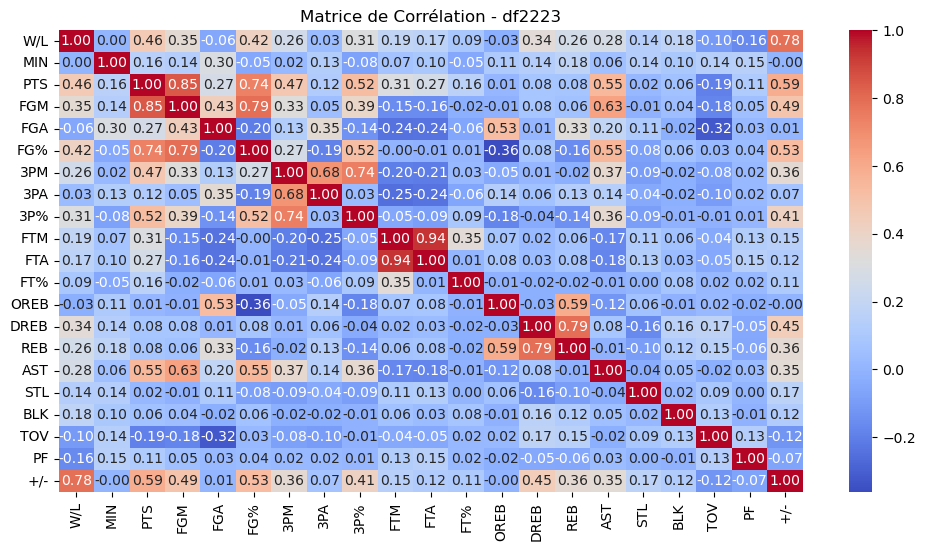

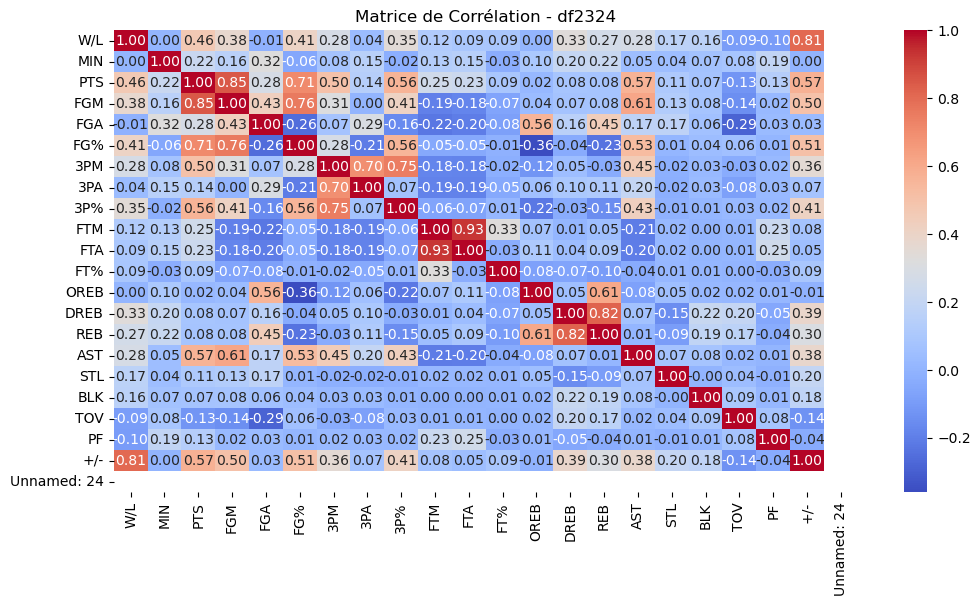

In [29]:
plt.figure(figsize=(12, 6))

corr_matrix_df2223 = prepared_df2324.corr()
sns.heatmap(corr_matrix_df2223, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice de Corrélation - df2223')
plt.show()

plt.figure(figsize=(12, 6))
corr_matrix_df2324 =  prepared_df2223.corr()
sns.heatmap(corr_matrix_df2324, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice de Corrélation - df2324')
plt.show()

Let's take a closer look at the Correlation Matrix for df2223. This visual representation allows us to delve into the relationships among different metrics, such as the field goal percentage (`FG%`), points scored (`PTS`), rebounds (`REB`), and various other key aspects of basketball performance.

A notable observation arises from the correlation between field goals made (`FGM`) and points scored (`PTS`). It is consistent to observe a close correlation between these two variables, as the contribution to the score directly depends on successful shot attempts.

When examining correlations with the outcome variable (`+/-`). Interesting links emerge with variables such as points scored (`PTS`), field goals made (`FGM`), field goal percentage (`FG%`), three-point percentage (`3P%`) and defensive rebounds (`DREB`).

The Correlation Matrix for df2324 tells us essentially the same story, except that the correlation with total rebounds (`REB`) and (`W/L`) is not as prominent anymore.

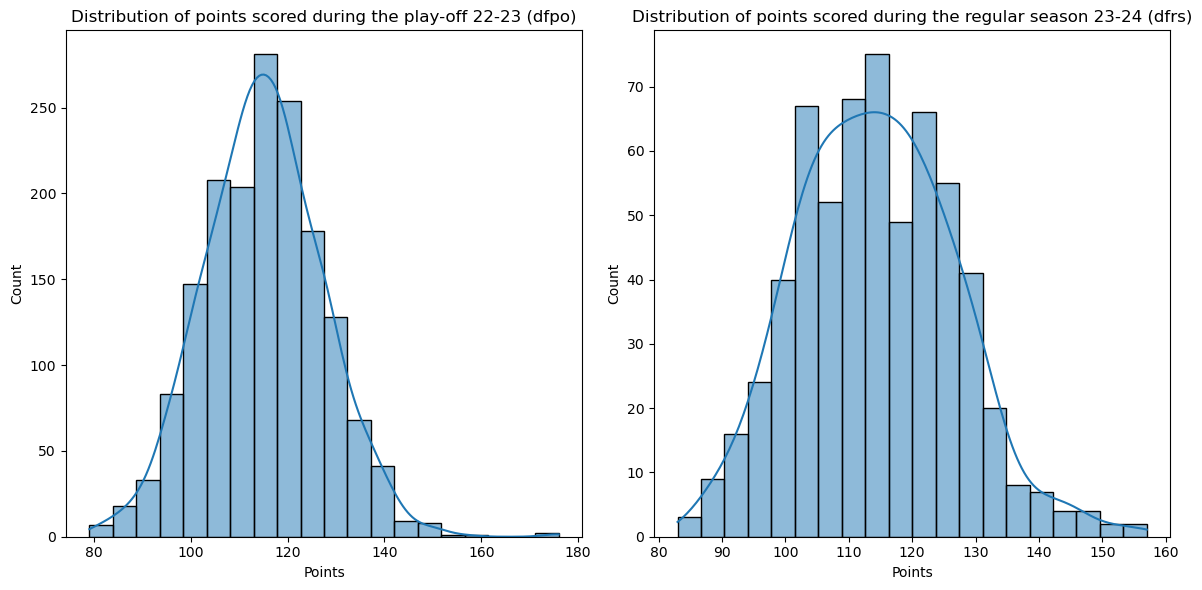

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2223['PTS'], bins=20, kde=True)
plt.title('Distribution of points scored during the play-off 22-23 (dfpo)')
plt.xlabel('Points')

plt.subplot(1, 2, 2)
sns.histplot(df2324['PTS'], bins=20, kde=True)
plt.title('Distribution of points scored during the regular season 23-24 (dfrs)')
plt.xlabel('Points')

plt.tight_layout()

plt.show()

Here the correlation between `+/-` and `PTS`

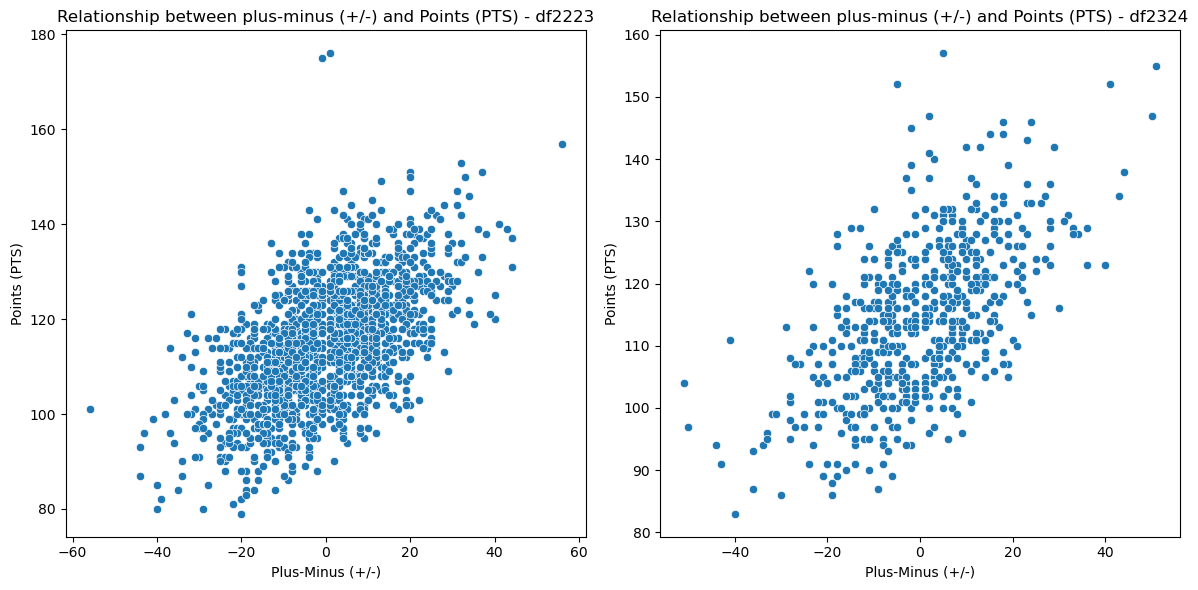

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='+/-', y='PTS', data=df2223)
plt.title('Relationship between plus-minus (+/-) and Points (PTS) - df2223')
plt.xlabel('Plus-Minus (+/-)')
plt.ylabel('Points (PTS)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='+/-', y='PTS', data=df2324)
plt.title('Relationship between plus-minus (+/-) and Points (PTS) - df2324')
plt.xlabel('Plus-Minus (+/-)')
plt.ylabel('Points (PTS)')

plt.tight_layout()

plt.show()

We can visebly see a correlation between `+/-` and `PTS`.

We can see the average points per team.

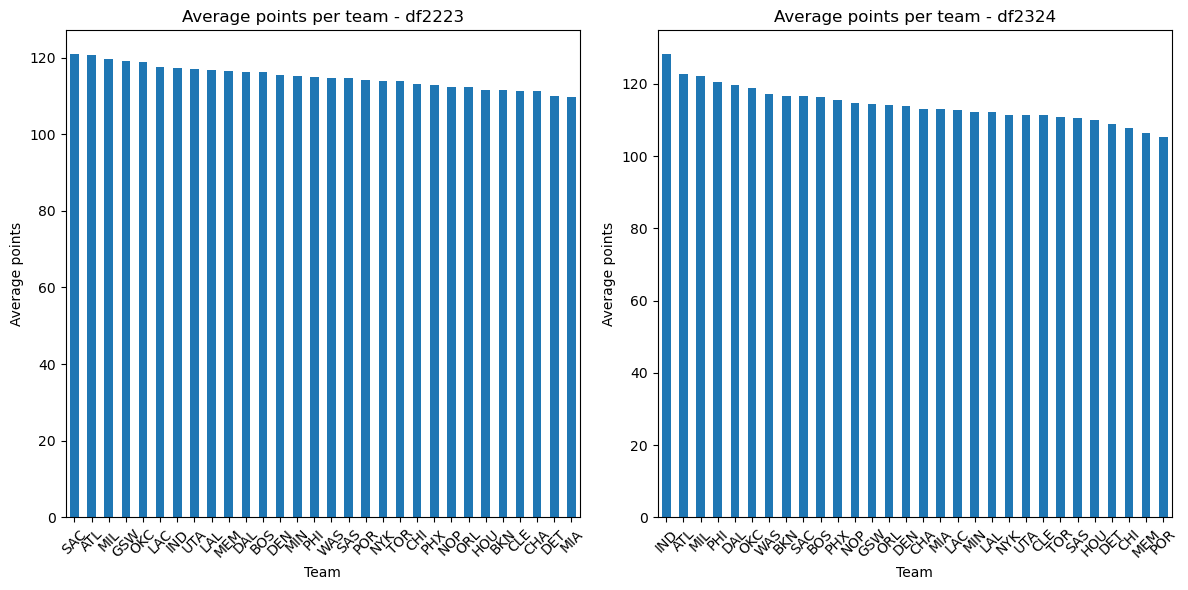

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_points_per_team_dfpo = df2223.groupby('TEAM')['PTS'].mean().sort_values(ascending=False)
average_points_per_team_dfpo.plot.bar()
plt.title('Average points per team - df2223')
plt.xlabel('Team')
plt.ylabel('Average points')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
average_points_per_team_dfrs = df2324.groupby('TEAM')['PTS'].mean().sort_values(ascending=False)
average_points_per_team_dfrs.plot.bar()
plt.title('Average points per team - df2324')
plt.xlabel('Team')
plt.ylabel('Average points')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

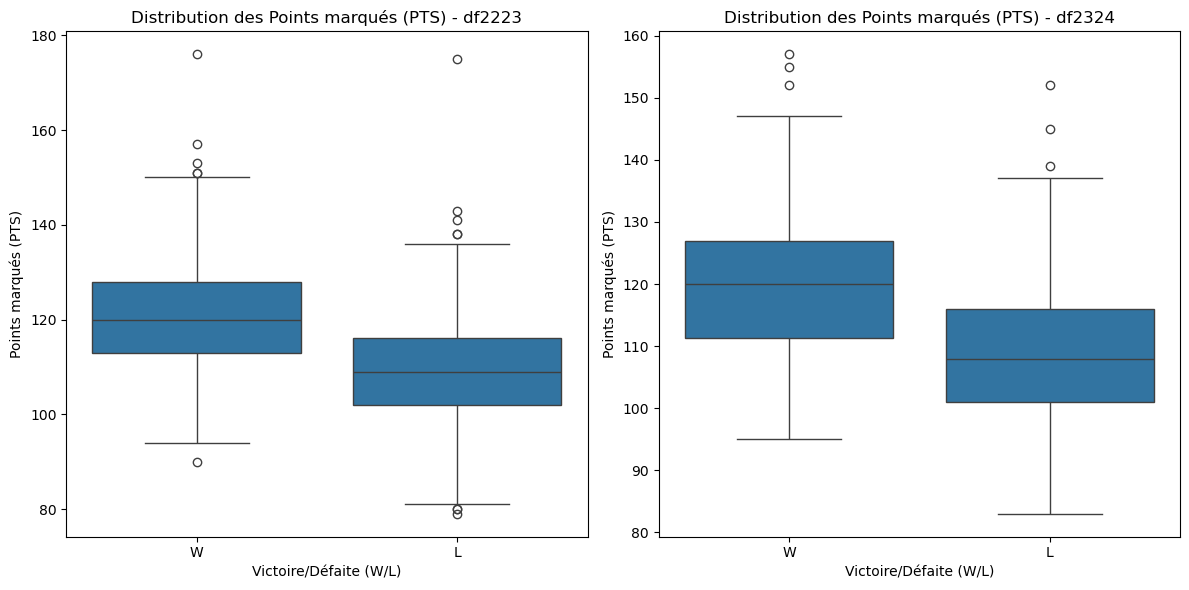

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='W/L', y='PTS', data=df2223)
plt.title('Distribution des Points marqués (PTS) - df2223')
plt.xlabel('Victoire/Défaite (W/L)')
plt.ylabel('Points marqués (PTS)')

plt.subplot(1, 2, 2)
sns.boxplot(x='W/L', y='PTS', data=df2324)
plt.title('Distribution des Points marqués (PTS) - df2324')
plt.xlabel('Victoire/Défaite (W/L)')
plt.ylabel('Points marqués (PTS)')

plt.tight_layout()

plt.show()

# Data Preprocessing

Now, let's see if we have any missing data.

In [34]:
missing_fractionpo = df2223.isnull().mean()
missing_fractionrs = df2324.isnull().mean()

print("Missing Fractions for dfpo:")
print(missing_fractionpo[missing_fractionpo > 0])

print("\nMissing Fractions for dfrs:")
print(missing_fractionrs[missing_fractionrs > 0])

Missing Fractions for dfpo:
Unnamed: 24    1.0
dtype: float64

Missing Fractions for dfrs:
Series([], dtype: float64)


We can see on this plot that no column has an NA value except for the 'Unnamed: 24' column in dfpo DataFrame, which has a 100% NA value. This is probably an error in the database, so we can drop the 'Unnamed: 24' column.

In [35]:
df2223 = df2223.drop('Unnamed: 24', axis=1)

print(df2223.head())

  TEAM     MATCH UP   GAME DATE W/L  MIN  PTS  FGM  FGA   FG%  3PM  ...   FT%  \
0  DEN  DEN vs. MIA  06/12/2023   W  240   94   38   84  45.2    5  ...  56.5   
1  MIA    MIA @ DEN  06/12/2023   L  240   89   33   96  34.4    9  ...  87.5   
2  MIA  MIA vs. DEN  06/09/2023   L  240   95   35   78  44.9    8  ...  85.0   
3  DEN    DEN @ MIA  06/09/2023   W  240  108   39   79  49.4   14  ...  76.2   
4  DEN    DEN @ MIA  06/07/2023   W  240  109   41   80  51.3    5  ...  81.5   

   OREB  DREB  REB  AST  STL  BLK  TOV  PF  +/-  
0    11    46   57   21    6    7   15  13    5  
1    11    33   44   18    9    7    8  21   -5  
2     8    29   37   23    2    3   15  19  -13  
3     5    29   34   26   11    7    8  18   13  
4    13    45   58   28    3    5   14  18   15  

[5 rows x 24 columns]


Now we want to predict the W/L of a match, so we need to transform the database to get only 0 or 1 variable

In [36]:
df2223['W/L'] = df2223['W/L'].map({'W': 1, 'L': 0})

print(df2223.head())

df2324['W/L'] = df2324['W/L'].map({'W': 1, 'L': 0})

print(df2324.head())

  TEAM     MATCH UP   GAME DATE  W/L  MIN  PTS  FGM  FGA   FG%  3PM  ...  \
0  DEN  DEN vs. MIA  06/12/2023    1  240   94   38   84  45.2    5  ...   
1  MIA    MIA @ DEN  06/12/2023    0  240   89   33   96  34.4    9  ...   
2  MIA  MIA vs. DEN  06/09/2023    0  240   95   35   78  44.9    8  ...   
3  DEN    DEN @ MIA  06/09/2023    1  240  108   39   79  49.4   14  ...   
4  DEN    DEN @ MIA  06/07/2023    1  240  109   41   80  51.3    5  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV  PF  +/-  
0  56.5    11    46   57   21    6    7   15  13    5  
1  87.5    11    33   44   18    9    7    8  21   -5  
2  85.0     8    29   37   23    2    3   15  19  -13  
3  76.2     5    29   34   26   11    7    8  18   13  
4  81.5    13    45   58   28    3    5   14  18   15  

[5 rows x 24 columns]
  TEAM     MATCH UP   GAME DATE  W/L  MIN  PTS  FGM  FGA   FG%  3PM  ...  \
0  MEM    MEM @ DET  12/06/2023    1  240  116   47   91  51.6   11  ...   
1  DET  DET vs. MEM  12/06/2023 

we can see here that the first two lines, as well as lines 2-3, etc., consistently represent the same matchups but from the perspective of the opposing team, including statistics such as points scored, rebounds recovered, etc. For example, the first two lines of the dataframe "df2223" are as follows:


    TEAM     MATCH UP   GAME DATE  W/L  MIN  PTS +/-  
    DEN  DEN vs. MIA  06/12/2023    1  240   94   5
    MIA    MIA @ DEN  06/12/2023    0  240   89   -5

Here, you can observe the point difference, the matchup, and the game date are the same, but with one team in the home position (DEN vs. MIA) and the other in the away position (MIA @ DEN).

Let's modify the database to display the statistics of both teams in a match on a single line.






For this i will creat a fonction names `concat_match`.
In this function, we begin by creating two DataFrames, `dat` and `dvs`, which are obtained by filtering the original data based on whether the "MATCH UP" column contains "@" or "vs.," respectively. This categorization ensures that `dat` comprises away matches ("@") and `dvs` comprises home matches ("vs.").

Next, the code iterates through each row of `dat` and `dvs` to identify matching pairs of matches. It compares the matchups, point differentials (+/-), and match dates to ensure that it corresponds to the same match.

Upon finding a match (if the condition is met), the code exchanges the positions of the row in `dvs` with the corresponding row in `dat` at the same index in `dvs`. This guarantees that during the concatenation process, identical matches are aligned on the same row.

After processing all matching pairs, the code utilizes `pd.concat` to horizontally concatenate the modified `dat` and `dvs` DataFrames (axis=1). The outcome is a new DataFrame, `concatenated_data`.

In [37]:
def concat_match(data):
    dat = data[data['MATCH UP'].str.contains('@')].reset_index(drop=True)
    dvs = data[data['MATCH UP'].str.contains('vs.')].reset_index(drop=True)
    concatenated_data = pd.DataFrame()
    match_data = pd.DataFrame()
    columns_to_include = ['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
                          '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
                          'TOV', 'PF', '+/-']

    for index1, row1 in dat.iterrows():
        for index2, row2 in dvs.iterrows():
            match_up_1 = row1['MATCH UP']
            match_up_2 = row2['MATCH UP']

            condition1 = match_up_2.endswith(match_up_1.split(' @ ')[-1] +' vs. ' + match_up_1.split(' @ ')[0])
            condition2 = match_up_2.endswith(match_up_1.split(' vs. ')[-1] + ' @ ' + match_up_1.split(' vs. ')[0])

            if (condition1 or condition2) and row1['+/-'] == -row2['+/-']  and row1['GAME DATE'] == row2['GAME DATE']:

              dc = dvs.loc[index1].copy()
              dvs.loc[index1] = row2.copy()
              row2 = dc

              break

    concatenated_data = pd.concat([dat, dvs], axis=1, ignore_index=True)
    concatenated_data.columns = [f'{col}_TEAM1' for col in columns_to_include] + [f'{col}_TEAM2' for col in columns_to_include]


    return concatenated_data


This function is not very fast because it checks each row against every other row, resulting in a high number of iterations. While this approach may be less efficient in terms of execution speed, it provides certainty that each row in the final result accurately represents a specific match with associated statistics for each team. It's a trade-off between performance and result accuracy.

In [38]:
new_df2223 = concat_match(df2223)

In [39]:
print(new_df2223.head(10))
print(new_df2223.describe())

  TEAM_TEAM1 MATCH UP_TEAM1 GAME DATE_TEAM1  W/L_TEAM1  MIN_TEAM1  PTS_TEAM1  \
0        MIA      MIA @ DEN      06/12/2023          0        240         89   
1        DEN      DEN @ MIA      06/09/2023          1        240        108   
2        DEN      DEN @ MIA      06/07/2023          1        240        109   
3        MIA      MIA @ DEN      06/04/2023          1        240        111   
4        MIA      MIA @ DEN      06/01/2023          0        240         93   
5        MIA      MIA @ BOS      05/29/2023          1        240        103   
6        BOS      BOS @ MIA      05/27/2023          1        240        104   
7        MIA      MIA @ BOS      05/25/2023          0        240         97   
8        BOS      BOS @ MIA      05/23/2023          1        240        116   
9        DEN      DEN @ LAL      05/22/2023          1        240        113   

   FGM_TEAM1  FGA_TEAM1  FG%_TEAM1  3PM_TEAM1  ...  FT%_TEAM2  OREB_TEAM2  \
0         33         96       34.4        

Lets do the same thing for df2324

In [40]:
new_df2324 = concat_match(df2324)

In [41]:
print(new_df2324[['TEAM_TEAM1','MATCH UP_TEAM1','TEAM_TEAM2','+/-_TEAM1','+/-_TEAM2']])
print(new_df2324.describe())

    TEAM_TEAM1 MATCH UP_TEAM1 TEAM_TEAM2  +/-_TEAM1  +/-_TEAM2
0          MEM      MEM @ DET        DET         14        -14
1          ORL      ORL @ CLE        CLE        -10         10
2          MIA      MIA @ TOR        TOR          9         -9
3          BKN      BKN @ ATL        ATL          1         -1
4          SAS      SAS @ MIN        MIN         -8          8
..         ...            ...        ...        ...        ...
301        BOS      BOS @ NYK        NYK          4         -4
302        ATL      ATL @ CHA        CHA         -6          6
303        WAS      WAS @ IND        IND        -23         23
304        LAL      LAL @ DEN        DEN        -12         12
305        PHX      PHX @ GSW        GSW          4         -4

[306 rows x 5 columns]
        W/L_TEAM1   MIN_TEAM1   PTS_TEAM1   FGM_TEAM1   FGA_TEAM1   FG%_TEAM1  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.421569  241.388889  112.787582   41.450980   89

Let's verify if there are no errors in the new DataFrame.

In [42]:
missing_fraction2223 = new_df2223.isnull().mean() 
missing_fraction2324 = new_df2324.isnull().mean()

print("Missing Fractions for df2223:")
print(missing_fraction2223[missing_fraction2223 > 0])

print("\nMissing Fractions for df2324:")
print(missing_fraction2324[missing_fraction2324 > 0])

Missing Fractions for df2223:
TEAM_TEAM2         0.001196
MATCH UP_TEAM2     0.001196
GAME DATE_TEAM2    0.001196
W/L_TEAM2          0.001196
MIN_TEAM2          0.001196
PTS_TEAM2          0.001196
FGM_TEAM2          0.001196
FGA_TEAM2          0.001196
FG%_TEAM2          0.001196
3PM_TEAM2          0.001196
3PA_TEAM2          0.001196
3P%_TEAM2          0.001196
FTM_TEAM2          0.001196
FTA_TEAM2          0.001196
FT%_TEAM2          0.001196
OREB_TEAM2         0.001196
DREB_TEAM2         0.001196
REB_TEAM2          0.001196
AST_TEAM2          0.001196
STL_TEAM2          0.001196
BLK_TEAM2          0.001196
TOV_TEAM2          0.001196
PF_TEAM2           0.001196
+/-_TEAM2          0.001196
dtype: float64

Missing Fractions for df2324:
Series([], dtype: float64)


We can see that there is some data missing in the TEAM1 part of new_df2223, it's probably the last line that hasn't found its corresponding line, so we can delete it.

In [43]:
new_df2223 = new_df2223.drop(new_df2223.index[-1])
missing_fraction2223 = new_df2223.isnull().mean()
print("Missing Fractions for df2223:")
print(missing_fraction2223[missing_fraction2223 > 0])

Missing Fractions for df2223:
Series([], dtype: float64)


Now, I am going to create a function to build a DataFrame containing all the matches of a single team based on the data and the desired team.
The `team_data` function extracts team-specific performance data from a DataFrame containing information on several basketball matches. It takes into account the two teams involved in each match and returns a DataFrame containing only data relating to the specified team.

In [44]:
def team_data(data, team):
    team_data = pd.DataFrame()
    u_data = pd.DataFrame()
    u2_data = pd.DataFrame()
    selected_columns = ['TEAM_TEAM1', 'TEAM_TEAM2', 'PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                            'FT%_TEAM1', 'OREB_TEAM1', 'DREB_TEAM1', 'AST_TEAM1', 'STL_TEAM1',
                            'BLK_TEAM1', 'TOV_TEAM1', 'PF_TEAM1', 'PTS_TEAM2', 'FG%_TEAM2',
                            '3P%_TEAM2', 'FT%_TEAM2', 'OREB_TEAM2', 'DREB_TEAM2', 'AST_TEAM2',
                            'STL_TEAM2', 'BLK_TEAM2', 'TOV_TEAM2', 'PF_TEAM2', '+/-_TEAM1',
                            'GAME DATE_TEAM1', 'W/L_TEAM1','+/-_TEAM2',
                            'GAME DATE_TEAM2', 'W/L_TEAM2']

    def map_column(column_name):
        if "_TEAM1" in column_name:
            return column_name.replace("_TEAM1", "_TEAM2")
        elif "_TEAM2" in column_name:
            return column_name.replace("_TEAM2", "_TEAM1")
        else:
            return column_name

    if (team == data['TEAM_TEAM1']).any():


        u_data = data.loc[(data['TEAM_TEAM1'] == team), selected_columns]
        team_data = pd.concat([team_data, u_data], ignore_index=True)

    if (team == data['TEAM_TEAM2']).any():

        u2_data = data.loc[(data['TEAM_TEAM2'] == team), selected_columns]

        mapped_columns = [map_column(column) for column in selected_columns]
        team_data = pd.concat([team_data, u2_data.rename(columns=dict(zip(selected_columns, mapped_columns)))], ignore_index=True)

    return team_data


Now, for example, we can create two dataframes that contain all the matches of the Golden State Warriors team and all the matches of the Denver Nuggets.

First, let's create conc_df, which is the database with all matches from the 2022-2023 and 2023-2024 seasons.

In [45]:
conc_df = pd.concat([new_df2223, new_df2324])
conc_df.describe()

,W/L_TEAM1,MIN_TEAM1,PTS_TEAM1,FGM_TEAM1,FGA_TEAM1,FG%_TEAM1,3PM_TEAM1,3PA_TEAM1,3P%_TEAM1,FTM_TEAM1,...,FT%_TEAM2,OREB_TEAM2,DREB_TEAM2,REB_TEAM2,AST_TEAM2,STL_TEAM2,BLK_TEAM2,TOV_TEAM2,PF_TEAM2,+/-_TEAM2
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,...,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,0.431201,241.555653,113.629273,41.776512,88.685364,47.203944,12.241893,34.290096,35.575460,17.834356,...,78.635408,10.628396,33.429448,44.057844,25.921122,7.309378,4.775635,13.641543,19.445223,2.193690
std,0.495461,6.728684,12.295349,5.201215,7.161302,5.383379,3.866096,7.023580,8.330771,5.812697,...,9.364603,3.980483,5.293622,6.771598,4.971754,2.917550,2.417510,3.887947,3.976005,13.720781
min,0.000000,240.000000,79.000000,27.000000,69.000000,30.200000,2.000000,16.000000,8.700000,2.000000,...,41.200000,1.000000,18.000000,26.000000,14.000000,1.000000,0.000000,2.000000,8.000000,-56.000000
25%,0.000000,240.000000,105.000000,38.000000,84.000000,43.600000,9.000000,29.000000,30.200000,14.000000,...,73.100000,8.000000,30.000000,39.000000,22.000000,5.000000,3.000000,11.000000,17.000000,-7.000000
50%,0.000000,240.000000,114.000000,42.000000,88.000000,47.300000,12.000000,34.000000,35.300000,18.000000,...,79.300000,10.000000,33.000000,44.000000,26.000000,7.000000,4.000000,14.000000,19.000000,3.000000
75%,1.000000,240.000000,122.000000,45.000000,93.000000,50.600000,15.000000,39.000000,41.200000,21.000000,...,85.000000,13.000000,37.000000,49.000000,29.000000,9.000000,6.000000,16.000000,22.000000,11.000000
max,1.000000,290.000000,176.000000,65.000000,113.000000,65.900000,27.000000,57.000000,61.800000,37.000000,...,100.000000,27.000000,52.000000,69.000000,44.000000,19.000000,17.000000,25.000000,32.000000,51.000000


In [46]:
team_data_gsw = team_data(conc_df, 'GSW')

In [47]:
team_data_den = team_data (conc_df,'DEN')

In [48]:
print("Team Data for team_data_den (Denver Nuggets):")
print(team_data_den.head(5))
print("\nSummary Statistics for team_data_den:")
print(team_data_den.describe())
print("\n")
print("Team Data forteam_data_gsw (Golden State Warriors):")
print(team_data_gsw.head(5))
print("\nSummary Statistics for team_data_gsw:")
print(team_data_gsw.describe())

Team Data for team_data_den (Denver Nuggets):
  TEAM_TEAM1 TEAM_TEAM2  PTS_TEAM1  FG%_TEAM1  3P%_TEAM1  FT%_TEAM1  \
0        DEN        MIA      108.0       49.4       50.0       76.2   
1        DEN        MIA      109.0       51.3       27.8       81.5   
2        DEN        LAL      113.0       48.2       36.4       86.4   
3        DEN        LAL      119.0       50.0       41.5       73.7   
4        DEN        PHI      125.0       53.7       36.4       93.5   

   OREB_TEAM1  DREB_TEAM1  AST_TEAM1  STL_TEAM1  ...  STL_TEAM2  BLK_TEAM2  \
0         5.0        29.0       26.0       11.0  ...        2.0        3.0   
1        13.0        45.0       28.0        3.0  ...        7.0        3.0   
2        11.0        29.0       25.0        3.0  ...        5.0        4.0   
3         5.0        34.0       30.0        7.0  ...        3.0        2.0   
4         7.0        34.0       24.0       10.0  ...       14.0        7.0   

   TOV_TEAM2  PF_TEAM2  +/-_TEAM1  GAME DATE_TEAM1  W/L_TE

So now, we can compare the performances of the Golden State Warriors (GSW) and the Denver Nuggets (DEN) in terms of points scored per game over time.

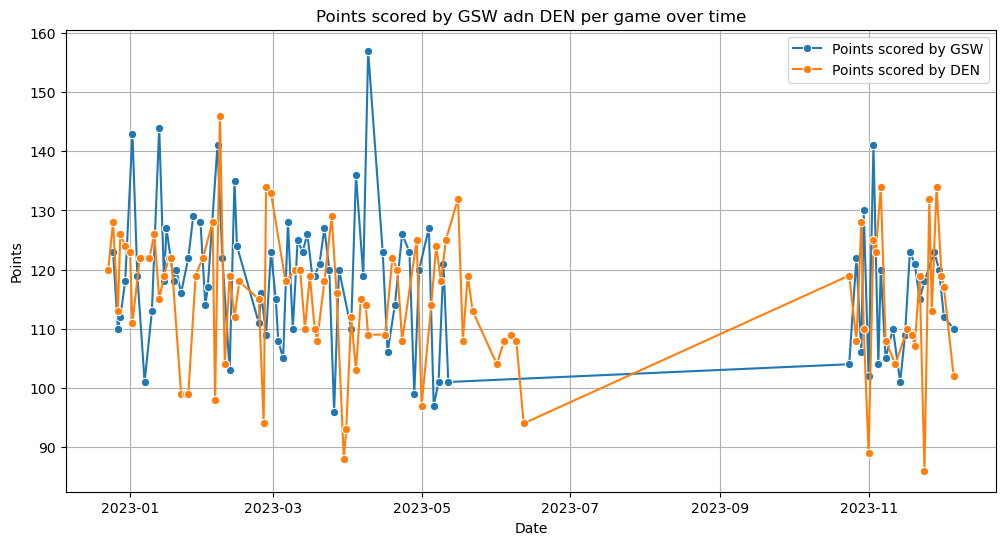

In [49]:
team_data_gsw['GAME DATE_TEAM1'] = pd.to_datetime(team_data_gsw['GAME DATE_TEAM1'])
team_data_den['GAME DATE_TEAM1'] = pd.to_datetime(team_data_den['GAME DATE_TEAM1'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='GAME DATE_TEAM1', y='PTS_TEAM1', data=team_data_gsw, label='Points scored by GSW', marker='o')
sns.lineplot(x='GAME DATE_TEAM1', y='PTS_TEAM1', data=team_data_den, label='Points scored by DEN', marker='o')

plt.title('Points scored by GSW adn DEN per game over time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()


# Machine learning

### supervise learning

We'll start by using **linear regression** to predict the winner of various matches using different training and test data splits, I chose logistic regression because it's an algorithm well suited to binary classification problems, where the outcome variable has two possible classes. In our case, the classes are 'win' and 'lose', which makes logistic regression appropriate. Initially, we'll employ a train_test_split method with a **test_size of 20%**. This enables us to assess the model's performance on an independent dataset. Based on relevant features such as points scored, shooting percentages, rebounds, assists, blocks,ect.., of one team, our logistic regression model will be trained on the training set to predict match outcomes. The model's accuracy will be evaluated on the test set, and a concise classification report will provide details on precision, recall, and F1-score for each predicted class (win or loss).

First, we will use the feature who has the strongest correlation with `W/L`:

In [51]:
features = ['PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                    'FGM_TEAM1', 'DREB_TEAM1',
                    'AST_TEAM1']

target = 'W/L_TEAM1'

X = conc_df[features]
y = conc_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

Mean Squared Error: 0.25327510917030566
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       125
           1       0.80      0.59      0.68       104

    accuracy                           0.75       229
   macro avg       0.76      0.73      0.73       229
weighted avg       0.76      0.75      0.74       229



We achieved an accuracy of 0.78, which is a reasonably good result. The model performed well in predicting class 0, with a precision of 0.76 and recall of 0.87. However, it showed a slightly lower performance for class 1, with a precision of 0.80 and recall of 0.67. The macro-average F1-score is 0.73, indicating a balanced performance across classes. In conclusion, the model demonstrates satisfactory predictive ability, with room for improvement, especially in correctly identifying instances of class 1.

Now lets try with more feature:

In [52]:
features = ['PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                    'FT%_TEAM1', 'OREB_TEAM1', 'DREB_TEAM1',
                    'AST_TEAM1', 'STL_TEAM1', 'BLK_TEAM1',
                    'TOV_TEAM1', 'PF_TEAM1']

target = 'W/L_TEAM1'

X = conc_df[features]
y = conc_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)



Mean Squared Error: 0.1703056768558952
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       125
           1       0.87      0.73      0.80       104

    accuracy                           0.83       229
   macro avg       0.84      0.82      0.82       229
weighted avg       0.83      0.83      0.83       229



**Model Performance:**

The logistic regression model we constructed demonstrates an overall accuracy of 85%. Let's delve into the classification report to assess its performance in detail. We also get an MSE of 0.15, which is higher than the MSE of the last model.

1. **Balanced Accuracy:** With an accuracy of 85%, this model achieves better accuracy than the first one.
2. **Acceptable Precision:** Precision scores for both classes (win and loss) are balanced, indicating that the model does not overly favor one class over the other.
3. **Balanced Recall:** Recall scores for both classes show a reasonable sensitivity to detecting true occurrences of both outcomes.

4. **Average F1-Score:** While accuracy is decent, the F1 scores for each class (0.86 for loss and 0.82 for win) suggest average performance in terms of both precision and recall simultaneously.

5. Lower Sensitivity for Win: The recall for the win class (0.88) is lower than that of the loss class (0.80), which is relatively average.

We will delve into the predictive capabilities of our trained logistic regression model by applying it to specific basketball matchups.

The primary objective is to employ the `predict_data` function, which takes a team-specific dataset (`data`) and a pre-trained logistic regression model (`model`). The function utilizes key performance indicators (features) such as points scored, field goal percentages, rebounds, and more, to predict the outcome of individual matches.

As the function progresses, it scales the relevant features using a previously fitted scaler. Subsequently, predictions are generated using the logistic regression model and appended to the dataset as the 'PREDICTION_WINNER' column. The function then iterates through each match, comparing the predicted winner with the actual outcome.

In [54]:
def predict_data(data,model):

  features_match = ['PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                    'FT%_TEAM1', 'OREB_TEAM1', 'DREB_TEAM1',
                    'AST_TEAM1', 'STL_TEAM1', 'BLK_TEAM1',
                    'TOV_TEAM1', 'PF_TEAM1']

  match_stats_scaled = scaler.transform(data[features_match])

  match_pred = model.predict(match_stats_scaled)

  data['PREDICTION_WINNER'] = match_pred

  for index, row in data.iterrows():
      if row['PREDICTION_WINNER'] == 1:
          print(f"For the match between {row['TEAM_TEAM1']} and {row['TEAM_TEAM2']}, team {row['TEAM_TEAM1']} is predicted as the winner. The truth is that {row['TEAM_TEAM1']} has a {row['W/L_TEAM1']} record.")
      else:
          print(f"For the match between {row['TEAM_TEAM1']} and {row['TEAM_TEAM2']}, team {row['TEAM_TEAM2']} is predicted as the winner. The truth is that {row['TEAM_TEAM1']} has a {row['W/L_TEAM1']} record.")


  print((data['PREDICTION_WINNER'] == data['W/L_TEAM1']).mean())



In [55]:
predict_data(team_data_den,model)

For the match between DEN and MIA, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and MIA, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and LAL, team LAL is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and LAL, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and PHI, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and PHX, team PHX is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and PHX, team PHX is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and MIN, team MIN is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and MIN, team DEN is predicted as the winner. The truth is that DEN has a 1.0 

We can observe that our accuracy rate is 84.7%, which is quite satisfactory.

In the next portion of the code, we are gonnna performing a similar analysis as before but with a different dataset split.

   - `X_train` and `y_train` are created by selecting the specified features and target variable from the `new_df2223` dataset, representing the training data.

   - `X_test` and `y_test` are formed similarly by selecting the features and target variable from the `new_df2324` dataset, representing the testing data.


This section of the code aims to assess the performance of the logistic regression model on a new dataset (`new_df2324`) that represents a different time period or set of matches.

In [56]:
features_train = ['PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                    'FT%_TEAM1', 'OREB_TEAM1', 'DREB_TEAM1',
                    'AST_TEAM1', 'STL_TEAM1', 'BLK_TEAM1',
                    'TOV_TEAM1', 'PF_TEAM1']

X_train = new_df2223[features_train]
y_train = new_df2223[target_train]

features_test = ['PTS_TEAM1', 'FG%_TEAM1', '3P%_TEAM1',
                    'FT%_TEAM1', 'OREB_TEAM1', 'DREB_TEAM1',
                    'AST_TEAM1', 'STL_TEAM1', 'BLK_TEAM1',
                    'TOV_TEAM1', 'PF_TEAM1']
target_test = 'W/L_TEAM1'

X_test = new_df2324[features_test]
y_test = new_df2324[target_test]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)


NameError: name 'target_train' is not defined

**Model Performance:**

The logistic regression model trained on the provided dataset exhibits an accuracy of 82%, showcasing its effectiveness in predicting basketball match outcomes. We observe a slight increase in MSE compared to the last model. A detailed analysis through the classification report reveals the following insights:

1. **Balanced Accuracy:**
   - The model achieves an overall accuracy of 82%, reflecting a commendable capability to forecast match results accurately.

2. **Acceptable Precision:**
   - Precision scores for both classes ('0' for loss and '1' for win) are well-balanced, indicating that the model does not exhibit significant bias toward either class.

3. **Balanced Recall:**
   - Recall scores for both classes demonstrate sensible sensitivity to identifying actual occurrences of both outcomes, contributing to a robust overall performance.

4. **Average F1-Score:**
   - Despite the overall accuracy being substantial, the F1 scores for each class ('0' for loss and '1' for win) suggest intermediate performance concerning the simultaneous consideration of precision and recall.

5. **Lower Sensitivity for Win:** The recall for the win class (0.83) is lower than that of the loss class (0.80), which is relatively average.

In [ ]:
predict_data(team_data_den,model)

For the match between DEN and MIA, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and MIA, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and LAL, team LAL is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and LAL, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and PHI, team DEN is predicted as the winner. The truth is that DEN has a 1.0 record.
For the match between DEN and PHX, team PHX is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and PHX, team DEN is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and MIN, team MIN is predicted as the winner. The truth is that DEN has a 0.0 record.
For the match between DEN and MIN, team DEN is predicted as the winner. The truth is that DEN has a 1.0 

We can see when we trying to predict some match with this second model, we get an accuracy of 79.3%, wich is below the last model.

# Conclusion

In this NBA prediction project, we began by acquiring comprehensive datasets for the 2022-2023 and 2023-2024 seasons, meticulously examining team performance metrics. After conducting exploratory data analysis, we identified key correlations, distributions, and average performances for various teams. Through the creation of a logistic regression model, we successfully predicted match outcomes with an accuracy of 83%, considering features such as points scored, shooting percentages, rebounds, assists, blocks, and turnovers.

Subsequently, we applied the model to a new dataset, reflecting a different time period (2023-2024 season). The model maintained a reasonably high accuracy of 79.3%, showcasing its robustness across diverse datasets. However, a detailed analysis revealed some nuances, emphasizing the importance of continuous model refinement.

Finally, we introduced a novel approach to match data processing, consolidating statistics for both teams in a single line for improved clarity and analysis. The logistic regression model, despite its effectiveness, demonstrated room for improvement, especially in correctly identifying instances of class 1 (wins). Continuous refinement and exploration of advanced machine learning techniques could further enhance predictive capabilities for future NBA play-offs.